# Ojus Sharma

## Research question/interests
**Who is best Wicket-Keeper in IPL History?** \
**Who are the top batting based and bowling based all-rounders in IPL History?** 

Selecting the top 11 players from the Indian Premier League (IPL) is a challenging task, considering the vast talent pool and individual performances across the 14 seasons. 
As an MS Dhoni fan, I am interested in finding the best wicket-keeper in IPL history. Further, I want to find the top 2 all-rounders in the IPL. Given the extensive database we have at hand, we wil calculate the of player statistics, including batting and bowling averages, strike rates, wicket-taking ability, playoff performance and other integral statistics. This data will be stored and processed in a separate file. I aim to use statistical analysis tools such as regression, correlation, and clustering to identify patterns and trends in the data. This would allow me to create a ranking system that factors in both individual and team performance, as well as the unique challenges and conditions of the IPL. Based on this analysis, I would identify the two best all-rounders and one wicketkeeper, taking into account factors such as consistency, reliability, and impact on the game.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from codes import project_functions3 as pf3

ball_by_ball = pf3.load_and_process("../data/raw/IPL_Ball_by_Ball_2008_2022.csv")
matches = pf3.load_and_process("../data/raw/IPL_Matches_2008_2022 (1).csv")

#### *Creating Wicketkeeper Database*

In [2]:
#FINDING UNIQUE KEEPERS IN IPL HISTORY
unique_stumpers = pf3.find_unique_wicketkeepers(ball_by_ball)
unique_stumpers

#FINDING ALL WICKETKEEPER STATISTCS
final_wicketkeeping_stats = pf3.find_wicketkeeper_stats(ball_by_ball, unique_stumpers)
final_wicketkeeping_stats.head(15)

,Catches,Stumpings,Innings,Dismissals,Dis/Inn
fielders_involved,,,,,
Vishnu Vinod,0,2,1,2,2.00
H Klaasen,4,4,4,8,2.00
Kamran Akmal,5,4,5,9,1.80
SP Jackson,7,2,5,9,1.80
Q de Kock,65,15,47,80,1.70
KS Bharat,4,1,3,5,1.67
M Rawat,16,2,11,18,1.64
JM Sharma,9,2,7,11,1.57
RR Pant,64,18,55,82,1.49


#### *Creating a Dataset after merging Wicketkeeper and Batting Statistics*

In [3]:
keeping_batting = pf3.find_and_merge_batting_stats_of_keepers(final_wicketkeeping_stats).reset_index().drop(columns=["index"])
#w.to_csv("../data/processed/Wicketkeeping_stats.csv")
keeping_batting.head(15)

,fielders_involved,Catches,Stumpings,Innings,Dismissals,Dis/Inn,Strike Rate,Runs Per Wicket
0,AB de Villiers,120,8,99,128,1.29,148.58,41.45
1,AC Gilchrist,51,16,45,67,1.49,133.05,27.22
2,AT Rayudu,62,2,61,64,1.05,124.15,29.51
3,BB McCullum,38,6,39,44,1.13,126.85,27.19
4,Ishan Kishan,33,2,25,35,1.40,129.50,30.16
5,JC Buttler,43,1,33,44,1.33,144.86,39.89
6,JM Bairstow,20,4,17,24,1.41,138.07,33.97
7,KC Sangakkara,45,9,37,54,1.46,118.47,24.45
8,KD Karthik,133,34,123,167,1.36,129.27,26.05
9,KL Rahul,59,5,53,64,1.21,132.80,46.37


## **Exploratory Data Analysis**

### **I. BEST WICKETKEEPER IN IPL HISTORY?**

### ***Question 1 : Who have the most Dismissals in IPL History?***
Sourcing from the above datasets, I will create a visualization to show the total dismissals by the above Wicketkeepers

Text(0, 0.5, 'Player Names')

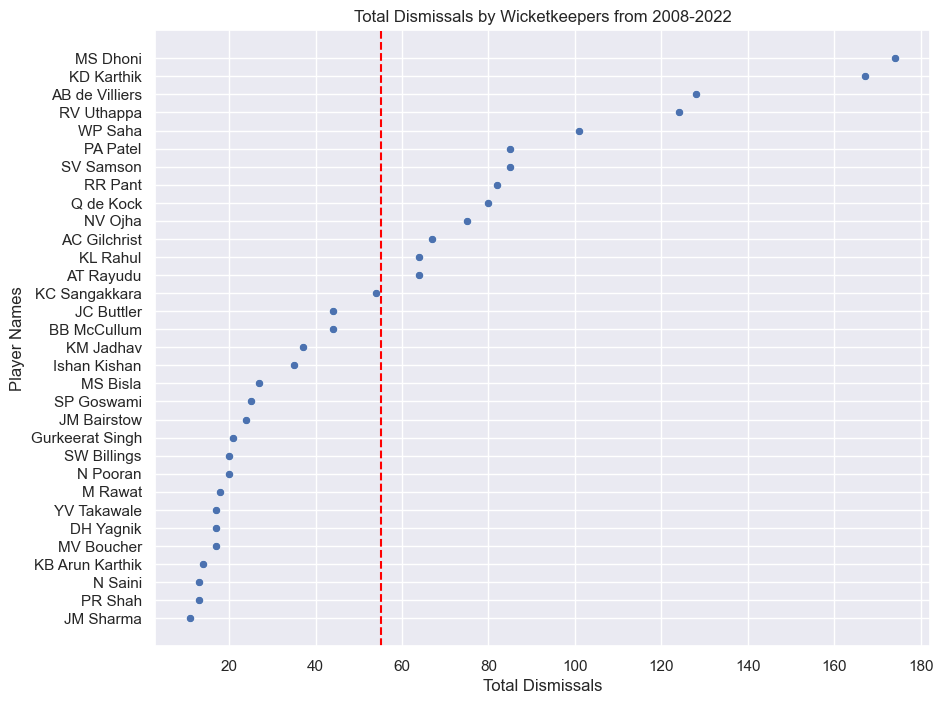

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
fws = final_wicketkeeping_stats

#GRAPHING TOTAL DISMISSALS BY ALL KEEPERS WITH MORE THAN 10 DISMISSALS
fws = fws[fws['Dismissals']>10]
fws=fws.sort_values('Dismissals', ascending=False)
fig = plt.figure(figsize=(10, 8))
sns.set_theme(style="darkgrid")
sns.set(font_scale=1)
sns.scatterplot(data=fws, x='Dismissals', y='fielders_involved')
mean_x = fws['Dismissals'].mean()
plt.axvline(mean_x, color='red', linestyle='--', label='Average')

plt.title('Total Dismissals by Wicketkeepers from 2008-2022')
plt.xlabel('Total Dismissals')
plt.ylabel('Player Names')


#### **ANSWER TO QUESTION 1**
* ***MS Dhoni has the highest number of wickets in IPL History, closely followed by KD Karthik***
* ***Their longevity at the highest level of the game is clearly exhibited by the vast differnce between them and the rest of the Wicketkeepers***
* ***AB de Villiers and RV Uthhappa are also considerably above the average and the rest of the field***

### ***Question 2 : Who are the best Wicketkeeping Batsmen?***

Now, focussing deeper into the batting side of a wicket-keeper, it is essential for us to take into account that every wicket-keeper must be a good batsmen.\
Let's have a look.

In [5]:
keeper_batsmen_stats = pf3.find_and_merge_batting_stats_of_keepers(final_wicketkeeping_stats)
keeper_batsmen_stats.sort_values(by="Runs Per Wicket", ascending = False).head(10)

,fielders_involved,Catches,Stumpings,Innings,Dismissals,Dis/Inn,Strike Rate,Runs Per Wicket
18,KL Rahul,59,5,53,64,1.21,132.80,46.37
0,AB de Villiers,120,8,99,128,1.29,148.58,41.45
11,JC Buttler,43,1,33,44,1.33,144.86,39.89
24,MS Dhoni,135,39,127,174,1.37,130.93,35.06
12,JM Bairstow,20,4,17,24,1.41,138.07,33.97
33,RR Pant,64,18,55,82,1.49,142.55,33.54
32,Q de Kock,65,15,47,80,1.70,130.95,32.17
10,Ishan Kishan,33,2,25,35,1.40,129.50,30.16
37,SV Samson,73,12,65,85,1.31,132.41,29.63
3,AT Rayudu,62,2,61,64,1.05,124.15,29.51


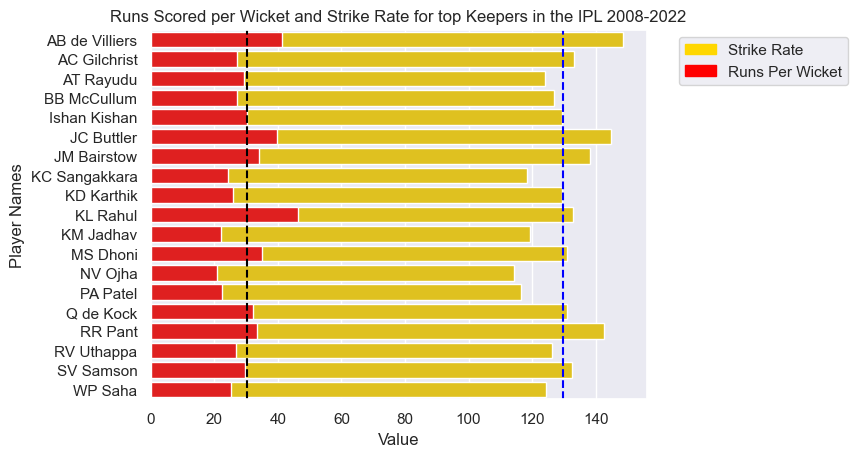

In [6]:
sns.barplot(data=keeper_batsmen_stats, x="Strike Rate", y="fielders_involved", color = 'Gold')
mean_x1 = keeper_batsmen_stats['Strike Rate'].mean()

sns.barplot(data=keeper_batsmen_stats, x="Runs Per Wicket", y="fielders_involved", color = "red")
mean_x2 = keeper_batsmen_stats['Runs Per Wicket'].mean()

legend_labels = ['Strike Rate', 'Runs Per Wicket']
legend_handles = [plt.Rectangle((0,0),1,1, color='Gold'), plt.Rectangle((0,0),1,1, color='red')]
plt.legend(legend_handles, legend_labels, bbox_to_anchor=(1.05, 1), loc='upper left')

plt.title('Runs Scored per Wicket and Strike Rate for top Keepers in the IPL 2008-2022')
plt.xlabel('Value')
plt.ylabel('Player Names')

plt.axvline(mean_x1, color='blue', linestyle='--')
plt.axvline(mean_x2, color='black', linestyle='--')

#### **ANSWER TO QUESTION 2**
* ***AB de Villiers has the highest Strike Rate of all Wicketkeepers, while KL Rahul has the highest Runs scored per ball***
* ***These two metrics allow to effectively gauge the quality of the batsmen***
* ***RR Pant, Q de Cock, MS Dhoni, KL Rahul, J Butler, J Barstow have AB de Villiers are the only players that have both metrics above the average value***

### ***Question 3 : Who has the most Stumpings as a Wicketkeeper?***

"Stumping is a method of dismissing a batsman in cricket, which involves the wicket-keeper putting down the wicket while the batsman is out of his ground." \
(Source: [Wikipedia](https://en.wikipedia.org/wiki/Stumped)) \
Stumping plays an integral role in a Wicketkeeper's arsenal as a player. It requires speed, agility and precision.\
It is critical for keepers to be good stumpers.

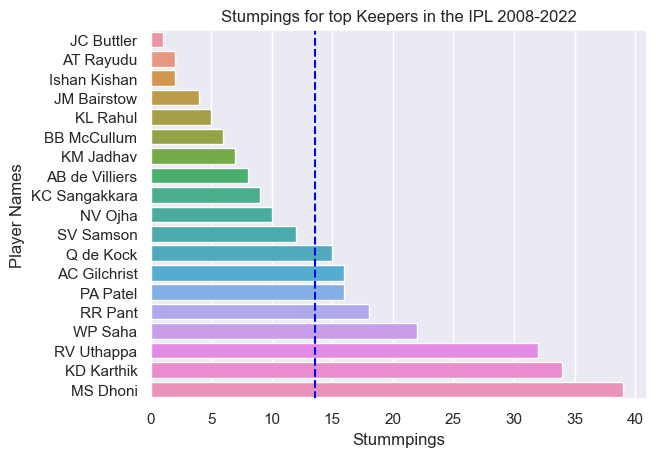

In [7]:
sns.barplot(data=keeper_batsmen_stats.sort_values('Stumpings'), x="Stumpings", y="fielders_involved")
mean_x1 = keeper_batsmen_stats['Stumpings'].mean()

plt.title('Stumpings for top Keepers in the IPL 2008-2022')
plt.xlabel('Stummpings')
plt.ylabel('Player Names')

plt.axvline(mean_x1, color='blue', linestyle='--')

#### **ANSWER TO QUESTION 3**
* ***MS Dhoni has the most stumpings by any Wicketkeeper in IPL History***
* ***AC Gilchrist, RR Pant, Q de Kock, MS Dhoni, KD Karthik, RV Uthappa and AB de Villiers are the only players that have more than average stumpings***
* ***It is important to know that some players have played significantly more inings than other player.***

### ***Question 4 : Who has the most Dismisslas per Innings as a Wicketkeeper?***

Given that the players have played varying numbers of innings, it is important to see how many dismissals they have every inning, that is, their efficiency.

,fielders_involved,Catches,Stumpings,Innings,Dismissals,Dis/Inn,Strike Rate,Runs Per Wicket
0,Q de Kock,65,15,47,80,1.70,130.95,32.17
1,WP Saha,79,22,68,101,1.49,124.40,25.28
2,AC Gilchrist,51,16,45,67,1.49,133.05,27.22
3,RR Pant,64,18,55,82,1.49,142.55,33.54
4,KC Sangakkara,45,9,37,54,1.46,118.47,24.45


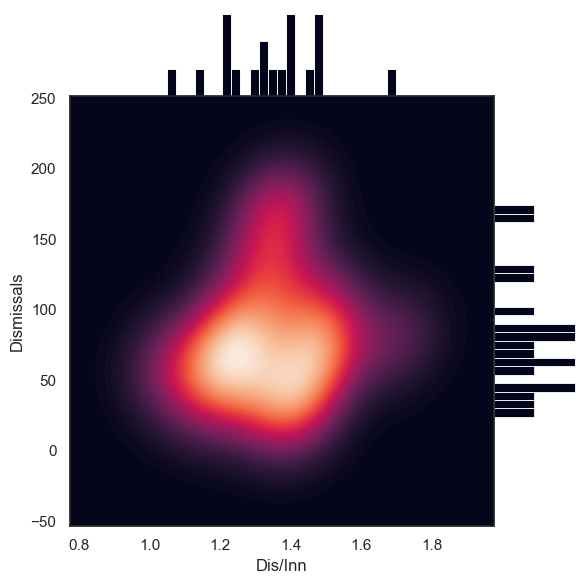

In [8]:
import seaborn as sns
sns.set_theme(style="white")

df = keeper_batsmen_stats
g = sns.JointGrid(data=df, x="Dis/Inn", y="Dismissals", space=0)
g.plot_joint(sns.kdeplot, fill=True,thresh=0, levels=100, cmap="rocket")
g.plot_marginals(sns.histplot, color="#03051A", alpha=1, bins=25)
plt.title('Dis/Inn vs Total Dismissals for top Keepers in the IPL 2008-2022', loc = 'right')

keeper_batsmen_stats.sort_values('Dis/Inn', ascending = False).head(5).reset_index(drop=True)

#### **ANSWER TO QUESTION 4**
* ***Q de Kock is the most efficient Keeper from this visualizationy***
* ***We see that Keepers with higher Dismissals have a lower value of Dis/Inn while people with high values of the same metric usually have around 100 dismissals***
* ***There is no player with explicitly high Dis/Inn and great number of Dismissals.***

### **II. BEST ALL-ROUNDERS IN IPL HISTORY**

In [9]:
#UTILISING PROCESSED DATASETS OF BOWLERS AND BATSMEN TO CREATE A NEW MERGED DATASET OF ALL ROUNDERS
allrounder_stats = pf3.find_allrounder_stats()
allrounder_stats

,bowler,Economy Rate,Matches,Total Runs,Strike Rate,Runs scored per wicket,Runs_Given_per_Wicket,Runs_Given,Wickets_Taken,Runs_Scored
0,DJ Bravo,8.08,110,1560,125.10,22.61,21.43,4436,207,1560
1,SP Narine,6.67,82,1025,154.37,16.02,22.85,3907,171,1025
2,RA Jadeja,7.58,157,2502,122.11,25.02,29.18,4114,141,2502
3,AR Patel,7.25,87,1135,123.50,19.24,28.81,3140,109,1135
4,SR Watson,7.70,141,3880,134.16,30.79,25.63,2742,107,3880
5,IK Pathan,7.70,82,1150,116.75,21.70,27.38,2711,99,1150


### ***Question 1 : Who are the Top Batting All-Rounders?***
***Sourcing from the above datasets, I will create a visualization to show the Runs Scored, Runs per Wicket, Strike Rate and Matches of the top All Rounders***

,bowler,Economy Rate,Matches,Total Runs,Strike Rate,Runs scored per wicket,Runs_Given_per_Wicket,Runs_Given,Wickets_Taken,Runs_Scored
0,SR Watson,7.70,141,3880,134.16,30.79,25.63,2742,107,3880
1,RA Jadeja,7.58,157,2502,122.11,25.02,29.18,4114,141,2502


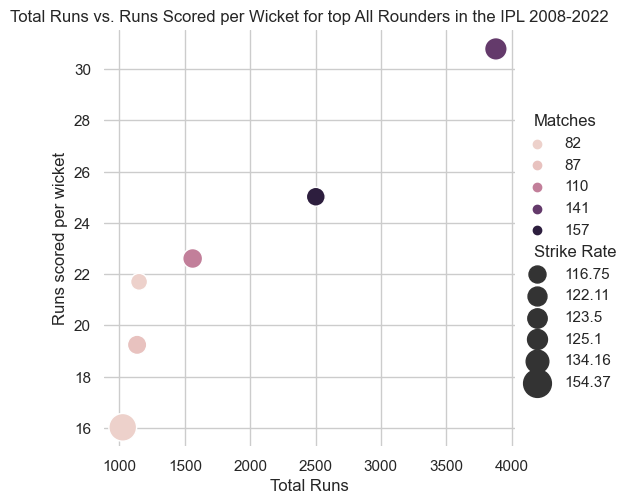

In [10]:
import seaborn as sns
sns.set_theme(style="whitegrid")

df = allrounder_stats
cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
g = sns.relplot(data=df, x="Total Runs", y="Runs scored per wicket", size="Strike Rate", hue = "Matches", sizes=(150, 400))

g.ax.xaxis.grid(True, "minor", linewidth=.25)
g.ax.yaxis.grid(True, "minor", linewidth=.25)
g.despine(left=True, bottom=True)
plt.title('Total Runs vs. Runs Scored per Wicket for top All Rounders in the IPL 2008-2022')

df.sort_values('Total Runs', ascending = False).head(2).reset_index(drop=True)

#### **ANSWER TO QUESTION 1**
* ***From the table and visualization, we see that SR Watson seems to be in a league of his own. R Jadeja is the only player close to him***

### ***Question 2 : Who are the Top Bowling All-Rounders?***
***Sourcing from the above datasets, I will create a visualization to show the Economy Rate and Total Wickets of the top All Rounders***

,bowler,Economy Rate,Matches,Total Runs,Strike Rate,Runs scored per wicket,Runs_Given_per_Wicket,Runs_Given,Wickets_Taken,Runs_Scored
0,DJ Bravo,8.08,110,1560,125.10,22.61,21.43,4436,207,1560
1,SP Narine,6.67,82,1025,154.37,16.02,22.85,3907,171,1025


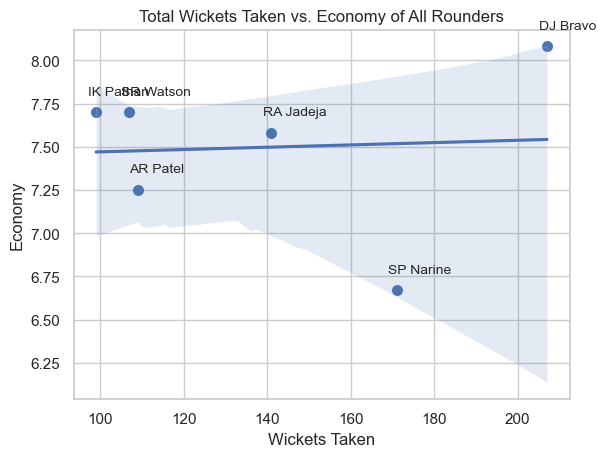

In [11]:
import matplotlib.pyplot as plt
import pandas as pd

allr = allrounder_stats
fig, ax = plt.subplots()
ax.scatter(allr['Wickets_Taken'], allr['Economy Rate'])

for i, row in allr.iterrows():
    x, y = row['Wickets_Taken'], row['Economy Rate']
    ax.text(float(x)-2, float(y)+0.1, row['bowler'], fontsize=10)

sns.regplot(data=allr, x='Wickets_Taken', y='Economy Rate', scatter_kws={'s':50})

ax.set_xlabel('Wickets Taken')
ax.set_ylabel('Economy')
ax.set_title('Total Wickets Taken vs. Economy of All Rounders')
df.sort_values('Wickets_Taken', ascending = False).head(2).reset_index(drop=True)



#### **ANSWER TO QUESTION 2**
* ***From the table and visualization, we see that DJ Bravo has high wickets and Economy. While Narine has low wickets and low economy***
* ***Te other All Rounders are clustered together, showing us the somewhat expected statistics of a top All Rounder***

## **FINAL ANALYSIS**

### RESEARCH QUESTION 1
**WHO IS THE BEST WICKETKEEPER IN  IPL HISTORY?** 

To solve this, here are my steps:
1. Load, Process and Wrangle given data to get all wicketkeeper statistics
2. Get rid of Players with less than 60 innings (To ensure that players with credible longevity are considered)
3. Merge the new list of wicketkeepers with their batting statistics, as Keepers have to be good batsmen
4. Create a weighted a score to find the best Wicketkeeper

#### **LOAD DATA**

In [12]:
import numpy as np
import pandas as pd
from codes import project_functions3 as pf3

ball_by_ball = pf3.load_and_process("../data/raw/IPL_Ball_by_Ball_2008_2022.csv")
matches = pf3.load_and_process("../data/raw/IPL_Matches_2008_2022 (1).csv")

#### **CLEAN, PROCESS AND WRANGLE DATA**

In [13]:
#FINDING UNIQUE KEEPERS IN IPL HISTORY
unique_stumpers = pf3.find_unique_wicketkeepers(ball_by_ball)

#FINDING ALL WICKETKEEPER STATISTCS
final_wicketkeeping_stats = pf3.find_wicketkeeper_stats(ball_by_ball, unique_stumpers)

#REMOVING ALL KEEPERS WITH LESS THAN 60 INNINGS
final_wicketkeeping_stats = final_wicketkeeping_stats[final_wicketkeeping_stats['Innings']>60]

#FINDING AND MERGING THE BATTING STATISTICS OF THE REMAINING KEEPERS
keeper_batsmen_stats = pf3.find_and_merge_batting_stats_of_keepers(final_wicketkeeping_stats)

#CREATING WEIGHTED SCORE
keeper_batsmen_stats = (keeper_batsmen_stats
    .assign(
        Weighted_Score=lambda x: x['Catches']*0.15 + x['Stumpings']*0.15 + x['Dis/Inn']*0.3 + x['Runs Per Wicket']*0.2 + x['Strike Rate']*0.2
            )
    .sort_values('Weighted_Score', ascending=False)
    .reset_index(drop=True)
)
keeper_batsmen_stats

,fielders_involved,Catches,Stumpings,Innings,Dismissals,Dis/Inn,Strike Rate,Runs Per Wicket,Weighted_Score
0,MS Dhoni,135,39,127,174,1.37,130.93,35.06,59.709
1,AB de Villiers,120,8,99,128,1.29,148.58,41.45,57.593
2,KD Karthik,133,34,123,167,1.36,129.27,26.05,56.522
3,RV Uthappa,92,32,89,124,1.39,126.15,26.92,49.631
4,SV Samson,73,12,65,85,1.31,132.41,29.63,45.551
5,WP Saha,79,22,68,101,1.49,124.40,25.28,45.533
6,PA Patel,69,16,70,85,1.21,116.63,22.43,40.925
7,AT Rayudu,62,2,61,64,1.05,124.15,29.51,40.647


Text(0, 0.5, 'Player Names')

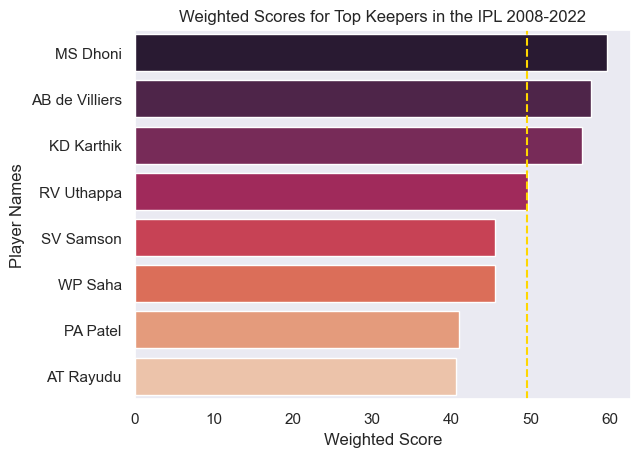

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('dark')
sns.barplot(data=keeper_batsmen_stats, x="Weighted_Score", y="fielders_involved", palette='rocket')
mean_x = keeper_batsmen_stats['Weighted_Score'].mean()
plt.axvline(mean_x, color='gold', linestyle='--', label='Average')
plt.title('Weighted Scores for Top Keepers in the IPL 2008-2022')
plt.xlabel('Weighted Score')
plt.ylabel('Player Names')

##### FROM THE CALCULATED WEIGHTED SCORE, WE SEE THAT **MS DHONI** IS THE BEST WICKETKEEPER IN IPL HISTORY

### RESEARCH QUESTION 2
**WHO ARE THE BEST ALLROUNDERS IN  IPL HISTORY?** 

Note: In the above research question (Wicketkeepers), I have loaded, processed and wrangled data independently. For this aspect of the research question, I will draw from the processed data my collegaues have created. I will take both their processed datasets and merge them using rudimentary techniques to achieve the desired outcome.
1. Load, Process and Wrangle given data to get all statistics
2. Processed data contains datasets of the best bowlers and batsmen in IPL.
3. Locate overlapping players and create a new dataframe withthem.
4. Create a weighted a score to find the best All Rounders

#### **LOAD DATA**

In [15]:
import numpy as np
import pandas as pd
from codes import project_functions3 as pf3

ball_by_ball = pf3.load_and_process("../data/raw/IPL_Ball_by_Ball_2008_2022.csv")
matches = pf3.load_and_process("../data/raw/IPL_Matches_2008_2022 (1).csv")

#### **CLEAN, PROCESS AND WRANGLE DATA**

In [16]:
#UTILISING PROCESSED DATASETS OF BOWLERS AND BATSMEN TO CREATE A NEW MERGED DATASET OF ALL ROUNDERS
allrounder_stats = pf3.find_allrounder_stats()

#CREATING WEIGHTED SCORE
df = allrounder_stats
allrounder_stats = df.assign(Weighted_Score_Batting=(df['Runs_Given_per_Wicket']*0.15+ df['Runs_Scored']*0.025 + df['Economy Rate']*0.15 + df['Strike Rate']*0.20 + df['Runs scored per wicket']*0.20 + df['Matches']*0.05)
                            ,Weighted_Score_Bowling=(df['Runs_Given_per_Wicket']*0.2 + df['Economy Rate']*0.2 + df['Strike Rate']*0.15 + df['Runs scored per wicket']*0.15 + df['Wickets_Taken']*0.25+ df['Matches']*0.05)).round(2)
allrounder_stats

,bowler,Economy Rate,Matches,Total Runs,Strike Rate,Runs scored per wicket,Runs_Given_per_Wicket,Runs_Given,Wickets_Taken,Runs_Scored,Weighted_Score_Batting,Weighted_Score_Bowling
0,DJ Bravo,8.08,110,1560,125.10,22.61,21.43,4436,207,1560,78.47,85.31
1,SP Narine,6.67,82,1025,154.37,16.02,22.85,3907,171,1025,68.23,78.31
2,RA Jadeja,7.58,157,2502,122.11,25.02,29.18,4114,141,2502,105.34,72.52
3,AR Patel,7.25,87,1135,123.50,19.24,28.81,3140,109,1135,66.68,60.22
4,SR Watson,7.70,141,3880,134.16,30.79,25.63,2742,107,3880,142.04,65.21
5,IK Pathan,7.70,82,1150,116.75,21.70,27.38,2711,99,1150,65.80,56.63


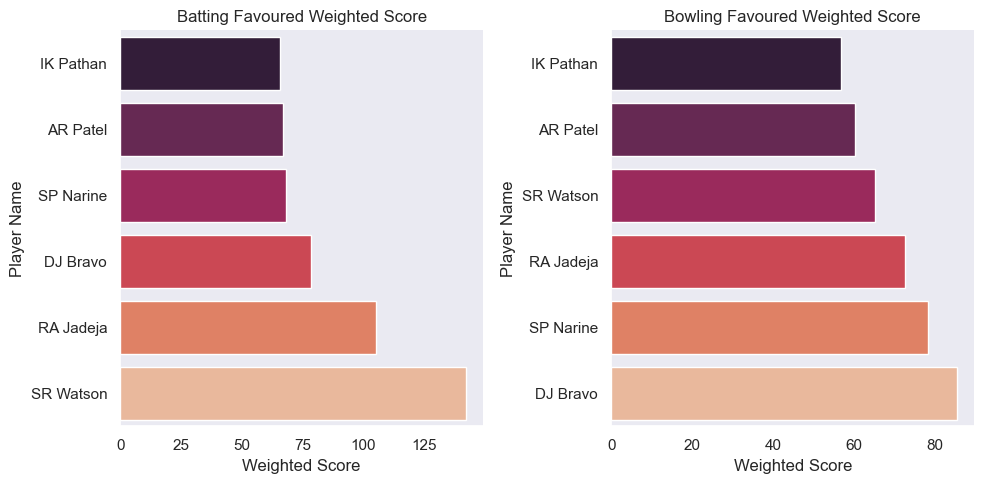

In [17]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

sns.set_style('dark')
fig, axes = plt.subplots(ncols=2, figsize=(10, 5))
sns.barplot(x='Weighted_Score_Batting', y='bowler', data=allrounder_stats.sort_values('Weighted_Score_Batting'), ax=axes[0], palette = 'rocket')
sns.barplot(x='Weighted_Score_Bowling', y='bowler', data=allrounder_stats.sort_values('Weighted_Score_Bowling'), ax=axes[1], palette = 'rocket')

axes[0].set_title('Batting Favoured Weighted Score')
axes[1].set_title('Bowling Favoured Weighted Score')
axes[0].set_ylabel('Player Name')
axes[1].set_ylabel('Player Name')
axes[0].set_xlabel('Weighted Score')
axes[1].set_xlabel('Weighted Score')

plt.tight_layout()
sns.despine()
plt.show()

##### FROM THE CALCULATED WEIGHTED SCORE, WE SEE THAT 
##### **SR WATSON** IS THE BEST BATTING FAVOURED ALL-ROUNDER IN IPL HISTORY
##### **DJ BRAVO** IS THE BEST BATTING FAVOURED ALL-ROUNDER IN IPL HISTORY

### **FINAL RESULT**

**RESEARCH QUESTION 1** \
WHO IS THE BEST WICKETKEEPER IN  IPL HISTORY?  \
***MS DHONI***


**RESEARCH QUESTION 2** 

*WHO IS THE BEST BATTING FAVOURED ALL-ROUNDER IN IPL HISTORY?*  \
***SR WATSON*** \
*WHO IS THE BEST BOWLING FAVOURED ALL-ROUNDER IN IPL HISTORY?*  \
***DJ BRAVO***